# **Aravindan N's SMDM Assignment**

In [1]:
#import the required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind
%matplotlib inline

import seaborn as sns
sns.set(style='ticks',color_codes=True)

## Problem 1 : Wholesale Customers Analysis

### Problem Statement: 

A wholesale distributor operating in different regions of Portugal has information on annual spending of several items in their stores across different regions and channels. The data consists of 440 large retailers’ annual spending on 6 different varieties of products in 3 different regions (Lisbon, Oporto, Other) and across different sales channel (Hotel, Retail).

In [ ]:
# Load the data
wcd_df = pd.read_csv(".\Wholesale_Customers_Data.csv")
wcd_df.head()

,Buyer/Spender,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1,Retail,Other,12669,9656,7561,214,2674,1338
1,2,Retail,Other,7057,9810,9568,1762,3293,1776
2,3,Retail,Other,6353,8808,7684,2405,3516,7844
3,4,Hotel,Other,13265,1196,4221,6404,507,1788
4,5,Retail,Other,22615,5410,7198,3915,1777,5185


In [ ]:
wcd_df.isnull().any().any()

False

In [ ]:
wcd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Buyer/Spender     440 non-null    int64 
 1   Channel           440 non-null    object
 2   Region            440 non-null    object
 3   Fresh             440 non-null    int64 
 4   Milk              440 non-null    int64 
 5   Grocery           440 non-null    int64 
 6   Frozen            440 non-null    int64 
 7   Detergents_Paper  440 non-null    int64 
 8   Delicatessen      440 non-null    int64 
dtypes: int64(7), object(2)
memory usage: 31.1+ KB


### 1.1 Use methods of descriptive statistics to summarize data. 

In [ ]:
wcd_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Buyer/Spender,440.0,220.500000,127.161315,1.0,110.75,220.5,330.25,440.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


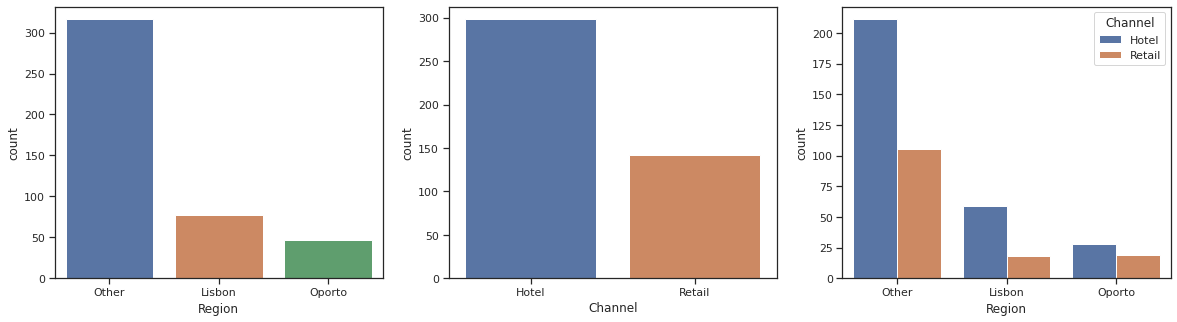

In [ ]:
fig, axes = plt.subplots(nrows=1,ncols=3, squeeze=True)

fig.set_size_inches(20,5)

a= sns.countplot(data=wcd_df, x='Region', order = wcd_df['Region'].value_counts().index, ax=axes[0]);

b= sns.countplot(data=wcd_df, x='Channel', order = wcd_df['Channel'].value_counts().index, ax=axes[1]);

c= sns.countplot(data=wcd_df, x='Region', order = wcd_df['Region'].value_counts().index, ax=axes[2], hue='Channel', hue_order=['Hotel','Retail']);

In [ ]:
wcd_df['Region'].value_counts()

Other     316
Lisbon     77
Oporto     47
Name: Region, dtype: int64

In [ ]:
wcd_df['Channel'].value_counts()

Hotel     298
Retail    142
Name: Channel, dtype: int64

In [ ]:
wcd_df[['Region','Channel']].value_counts()

Region  Channel
Other   Hotel      211
        Retail     105
Lisbon  Hotel       59
Oporto  Hotel       28
        Retail      19
Lisbon  Retail      18
dtype: int64

### 1.1.1 Which Region and which Channel spent the most? 

### 1.1.2 Which Region and which Channel spent the least?

In [ ]:
wcd_df.groupby(['Region','Channel']).sum()[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']]

Fresh     Milk  ...  Detergents_Paper  Delicatessen
Region Channel                    ...                                
Lisbon Hotel     761233   228342  ...             56081         70632
       Retail     93600   194112  ...            148055         33695
Oporto Hotel     326215    64519  ...             13516         30965
       Retail    138506   174625  ...            159795         23541
Other  Hotel    2928269   735753  ...            165990        320358
       Retail   1032308  1153006  ...            724420        191752

[6 rows x 6 columns]

In [ ]:
spend_df = pd.DataFrame(wcd_df.groupby(['Region','Channel']).sum()[['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen']])
spend_df

Fresh     Milk  ...  Detergents_Paper  Delicatessen
Region Channel                    ...                                
Lisbon Hotel     761233   228342  ...             56081         70632
       Retail     93600   194112  ...            148055         33695
Oporto Hotel     326215    64519  ...             13516         30965
       Retail    138506   174625  ...            159795         23541
Other  Hotel    2928269   735753  ...            165990        320358
       Retail   1032308  1153006  ...            724420        191752

[6 rows x 6 columns]

In [ ]:
spend_df['Total_Spending'] = spend_df['Fresh']+spend_df['Frozen']+spend_df['Grocery']+spend_df['Milk']+spend_df['Detergents_Paper']+spend_df['Delicatessen']
spend_df

Fresh     Milk  ...  Delicatessen  Total_Spending
Region Channel                    ...                              
Lisbon Hotel     761233   228342  ...         70632         1538342
       Retail     93600   194112  ...         33695          848471
Oporto Hotel     326215    64519  ...         30965          719150
       Retail    138506   174625  ...         23541          835938
Other  Hotel    2928269   735753  ...        320358         5742077
       Retail   1032308  1153006  ...        191752         4935522

[6 rows x 7 columns]

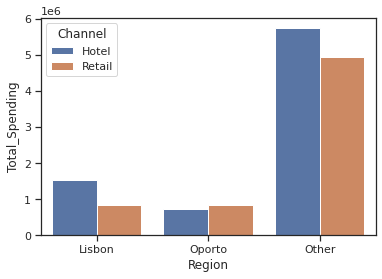

In [ ]:
spend_df=spend_df.reset_index()
sns.barplot(data=spend_df, x= 'Region', y='Total_Spending', hue='Channel');

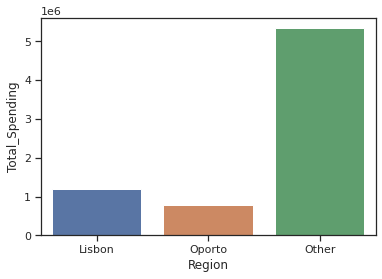

In [ ]:
sns.barplot(data=spend_df, x= 'Region', y='Total_Spending', ci=None);

In [ ]:
spend_df1= pd.pivot_table(wcd_df, index=['Region','Channel'],values=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicatessen'],aggfunc=np.sum)
spend_df1

Delicatessen  Detergents_Paper  ...  Grocery     Milk
Region Channel                                  ...                  
Lisbon Hotel           70632             56081  ...   237542   228342
       Retail          33695            148055  ...   332495   194112
Oporto Hotel           30965             13516  ...   123074    64519
       Retail          23541            159795  ...   310200   174625
Other  Hotel          320358            165990  ...   820101   735753
       Retail         191752            724420  ...  1675150  1153006

[6 rows x 6 columns]

In [ ]:
spend_df1['Total_Spending'] = spend_df1['Fresh']+spend_df1['Frozen']+spend_df1['Grocery']+spend_df1['Milk']+spend_df1['Detergents_Paper']+spend_df1['Delicatessen']
spend_df1=spend_df1.reset_index()
spend_df1

,Region,Channel,Delicatessen,Detergents_Paper,Fresh,Frozen,Grocery,Milk,Total_Spending
0,Lisbon,Hotel,70632,56081,761233,184512,237542,228342,1538342
1,Lisbon,Retail,33695,148055,93600,46514,332495,194112,848471
2,Oporto,Hotel,30965,13516,326215,160861,123074,64519,719150
3,Oporto,Retail,23541,159795,138506,29271,310200,174625,835938
4,Other,Hotel,320358,165990,2928269,771606,820101,735753,5742077
5,Other,Retail,191752,724420,1032308,158886,1675150,1153006,4935522


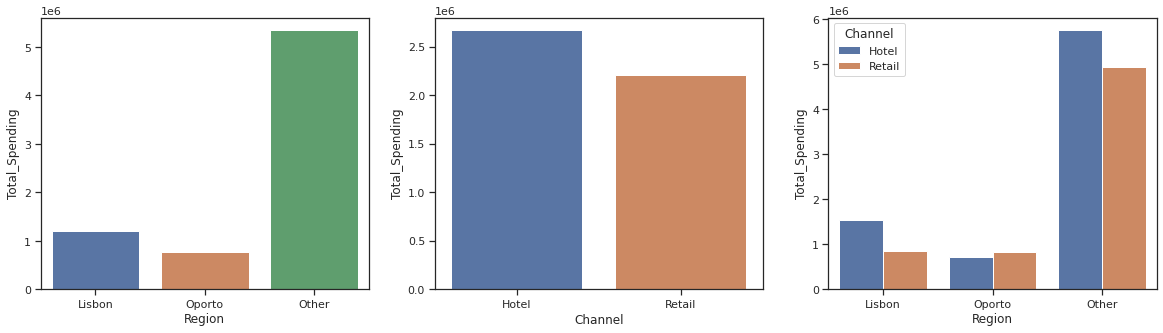

In [ ]:
fig1, axes1 = plt.subplots(nrows=1,ncols=3, squeeze=True)

fig1.set_size_inches(20,5)

A= sns.barplot(data=spend_df1, x= 'Region', y='Total_Spending', ci=None, ax=axes1[0]); 

B= sns.barplot(data=spend_df1, x= 'Channel', y='Total_Spending', ax=axes1[1], ci=None);

C= sns.barplot(data=spend_df1, x= 'Region', y='Total_Spending', hue='Channel', ax=axes1[2]);

In [ ]:
print(spend_df1.groupby('Region')['Total_Spending'].sum())

print(spend_df1.groupby('Channel')['Total_Spending'].sum())

Region
Lisbon     2386813
Oporto     1555088
Other     10677599
Name: Total_Spending, dtype: int64
Channel
Hotel     7999569
Retail    6619931
Name: Total_Spending, dtype: int64


In [ ]:
print(spend_df1.groupby(['Region','Channel'])['Total_Spending'].sum())

Region  Channel
Lisbon  Hotel      1538342
        Retail      848471
Oporto  Hotel       719150
        Retail      835938
Other   Hotel      5742077
        Retail     4935522
Name: Total_Spending, dtype: int64


### 1.2 There are 6 different varieties of items that are considered. Describe and comment/explain all the varieties across Region and Channel? Provide a detailed justification for your answer.

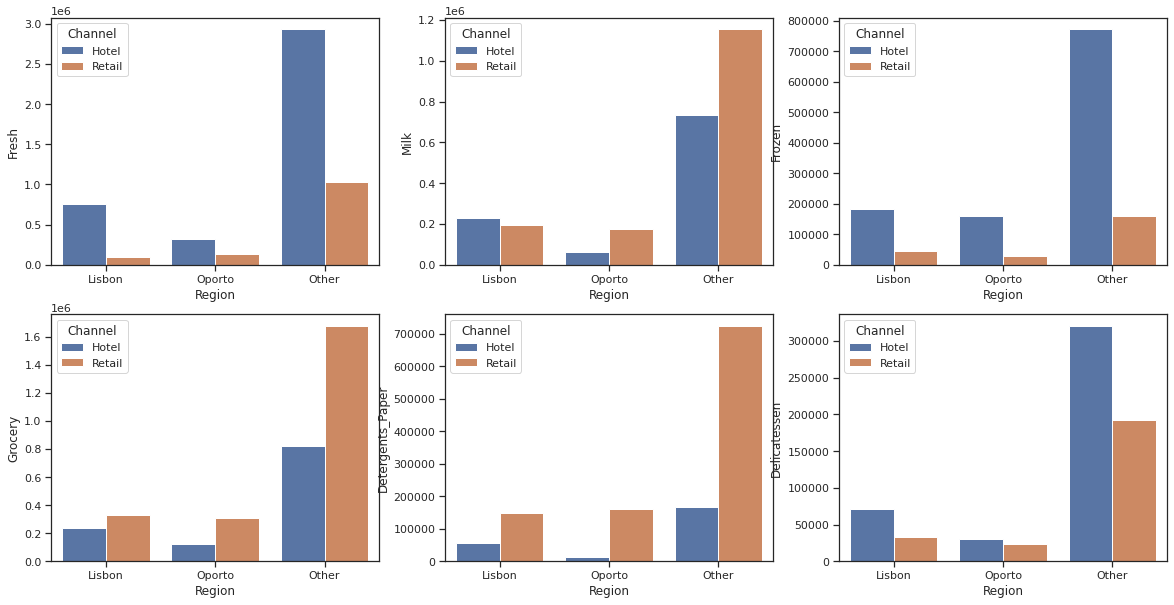

In [ ]:
fig2, axes2 = plt.subplots(nrows=2,ncols=3, squeeze=True)

fig2.set_size_inches(20,10)

AA= sns.barplot(data=spend_df1, x= 'Region', y='Fresh', hue='Channel', ci=None, ax=axes2[0][0]);

AB= sns.barplot(data=spend_df1, x= 'Region', y='Milk', hue='Channel', ci=None, ax=axes2[0][1]);

AC= sns.barplot(data=spend_df1, x= 'Region', y='Frozen', hue='Channel', ci=None, ax=axes2[0][2]);

AD= sns.barplot(data=spend_df1, x= 'Region', y='Grocery', hue='Channel', ci=None, ax=axes2[1][0]);

AE= sns.barplot(data=spend_df1, x= 'Region', y='Detergents_Paper', hue='Channel', ci=None, ax=axes2[1][1]);

AF= sns.barplot(data=spend_df1, x= 'Region', y='Delicatessen', hue='Channel', ci=None, ax=axes2[1][2]);

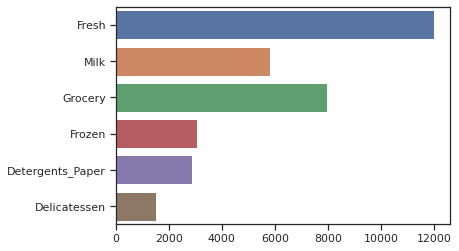

In [ ]:
sns.barplot(data=wcd_df.drop(columns='Buyer/Spender'), orient='h', ci=None);

### 1.3 On the basis of a descriptive measure of variability, which item shows the most inconsistent behaviour? Which items show the least inconsistent behaviour?

In [ ]:
spend_df1.drop(columns='Total_Spending').describe().T

,count,mean,std,min,25%,50%,75%,max
Delicatessen,6.0,111823.833333,1.200066e+05,23541.0,31647.50,52163.5,161472.00,320358.0
Detergents_Paper,6.0,211309.500000,2.589244e+05,13516.0,79074.50,153925.0,164441.25,724420.0
Fresh,6.0,880021.833333,1.068422e+06,93600.0,185433.25,543724.0,964539.25,2928269.0
Frozen,6.0,225275.000000,2.753430e+05,29271.0,74607.00,159873.5,178599.25,771606.0
Grocery,6.0,583093.666667,5.860127e+05,123074.0,255706.50,321347.5,698199.50,1675150.0
Milk,6.0,425059.500000,4.268906e+05,64519.0,179496.75,211227.0,608900.25,1153006.0


In [ ]:
print("The Coefficient of Variation for the Item - Fresh is: {}".format(np.std(wcd_df['Fresh']) / np.mean(wcd_df['Fresh'])))
print("The Coefficient of Variation for the Item - Frozen is: {}".format(np.std(wcd_df['Frozen']) / np.mean(wcd_df['Frozen'])))
print("The Coefficient of Variation for the Item - Grocery is: {}".format(np.std(wcd_df['Grocery']) / np.mean(wcd_df['Grocery'])))
print("The Coefficient of Variation for the Item - Milk is: {}".format(np.std(wcd_df['Milk']) / np.mean(wcd_df['Milk'])))
print("The Coefficient of Variation for the Item - Detergents_Paper is: {}".format(np.std(wcd_df['Detergents_Paper']) / np.mean(wcd_df['Detergents_Paper'])))
print("The Coefficient of Variation for the Item - Delicatessen is: {}".format(np.std(wcd_df['Delicatessen']) / np.mean(wcd_df['Delicatessen'])))

The Coefficient of Variation for the Item - Fresh is: 1.0527196084948245
The Coefficient of Variation for the Item - Frozen is: 1.5785355298607762
The Coefficient of Variation for the Item - Grocery is: 1.193815447749267
The Coefficient of Variation for the Item - Milk is: 1.2718508307424503
The Coefficient of Variation for the Item - Detergents_Paper is: 1.6527657881041729
The Coefficient of Variation for the Item - Delicatessen is: 1.8473041039189306


In [ ]:
wcd_df.drop(columns=['Buyer/Spender','Channel','Region']).describe().T

,count,mean,std,min,25%,50%,75%,max
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicatessen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


### 1.4 Are there any outliers in the data? Back up your answer with a suitable plot/technique with the help of detailed comments.

In [ ]:
wcd_drop_df = wcd_df.drop(columns=['Buyer/Spender', 'Channel', 'Region'])
wcd_drop_df.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


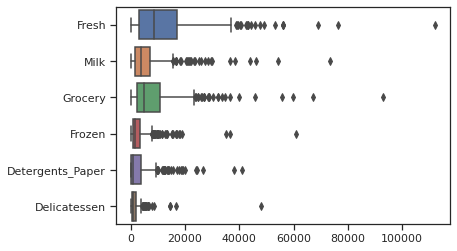

In [ ]:
sns.boxplot(data=wcd_drop_df, orient='h');

### 1.5 On the basis of your analysis, what are your recommendations for the business? How can your analysis help the business to solve its problem? Answer from the business perspective

## Problem 2 : CMSU Student Survey

### Problem Statement:
The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

In [6]:
cmsu_df=pd.read_csv('.\Survey.csv')
cmsu_df.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [ ]:
cmsu_df[['GPA',	'Salary',	'Spending', 'Text Messages']].describe().T

,count,mean,std,min,25%,50%,75%,max
GPA,62.0,3.129032,0.377388,2.3,2.9,3.15,3.4,3.9
Salary,62.0,48.548387,12.080912,25.0,40.0,50.00,55.0,80.0
Spending,62.0,482.016129,221.953805,100.0,312.5,500.00,600.0,1400.0
Text Messages,62.0,246.209677,214.465950,0.0,100.0,200.00,300.0,900.0


### 2.1. For this data, construct the following contingency tables (Keep Gender as row variable)

### 2.1.1. Gender and Major

In [ ]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Major'],margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


### 2.1.2. Gender and Grad Intention

In [20]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Grad Intention'],margins = True)

Grad Intention,No,Undecided,Yes,All
Gender,,,,
Female,9,13,11,33
Male,3,9,17,29
All,12,22,28,62


### 2.1.3. Gender and Employment

In [ ]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Employment'],margins = True)

Employment,Full-Time,Part-Time,Unemployed,All
Gender,,,,
Female,3,24,6,33
Male,7,19,3,29
All,10,43,9,62


### 2.1.4. Gender and Computer

In [ ]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Computer'],margins = True)

Computer,Desktop,Laptop,Tablet,All
Gender,,,,
Female,2,29,2,33
Male,3,26,0,29
All,5,55,2,62


### 2.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.2.1. What is the probability that a randomly selected CMSU student will be male?

In [ ]:
len(cmsu_df['Gender'])

62

In [ ]:
cmsu_df['Gender'].value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [ ]:
print('The probability that a randomly selected CMSC student will be male is',round((29/62)*100,2),'%')

The probability that a randomly selected CMSC student will be male is 46.77 %


### 2.2.2. What is the probability that a randomly selected CMSU student will be female?

In [ ]:
print('The probability that a randomly selected CMSC student will be female is',round((33/62)*100,2),'%')

The probability that a randomly selected CMSC student will be female is 53.23 %


### 2.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

### 2.3.1 Find the conditional probability of different majors among the male students in CMSU.

In [21]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Major'],margins = True)

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided,All
Gender,,,,,,,,,
Female,3,3,7,4,4,3,9,0,33
Male,4,1,4,2,6,4,5,3,29
All,7,4,11,6,10,7,14,3,62


In [22]:
print('The conditional probability of P(Accounting|Male) is',round((4/29)*100,2),'%')
print('The conditional probability of P(CIS|Male) is',round((1/29)*100,2),'%')
print('The conditional probability of P(Economics/Finance|Male) is',round((4/29)*100,2),'%')
print('The conditional probability of P(International Business|Male) is',round((2/29)*100,2),'%')
print('The conditional probability of P(Management|Male) is',round((6/29)*100,2),'%')
print('The conditional probability of P(Other|Male) is',round((4/29)*100,2),'%')
print('The conditional probability of P(Retailing/Marketing|Male) is',round((5/29)*100,2),'%')
print('The conditional probability of P(Undecided|Male) is',round((3/29)*100,2),'%')

The conditional probability of P(Accounting|Male) is 13.79 %
The conditional probability of P(CIS|Male) is 3.45 %
The conditional probability of P(Economics/Finance|Male) is 13.79 %
The conditional probability of P(International Business|Male) is 6.9 %
The conditional probability of P(Management|Male) is 20.69 %
The conditional probability of P(Other|Male) is 13.79 %
The conditional probability of P(Retailing/Marketing|Male) is 17.24 %
The conditional probability of P(Undecided|Male) is 10.34 %


### 2.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [ ]:
print('The conditional probability of P(Accounting|Female) is',round((3/33)*100,2),'%')
print('The conditional probability of P(CIS|Female) is',round((3/33)*100,2),'%')
print('The conditional probability of P(Economics/Finance|Female) is',round((7/33)*100,2),'%')
print('The conditional probability of P(International Business|Female) is',round((4/33)*100,2),'%')
print('The conditional probability of P(Management|Female) is',round((4/33)*100,2),'%')
print('The conditional probability of P(Other|Female) is',round((3/33)*100,2),'%')
print('The conditional probability of P(Retailing/Marketing|Female) is',round((9/33)*100,2),'%')
print('The conditional probability of P(Undecided|Female) is',round((0/33)*100,2),'%')

The conditional probability of P(Accounting|Female) is 9.09 %
The conditional probability of P(CIS|Female) is 9.09 %
The conditional probability of P(Economics/Finance|Female) is 21.21 %
The conditional probability of P(International Business|Female) is 12.12 %
The conditional probability of P(Management|Female) is 12.12 %
The conditional probability of P(Other|Female) is 9.09 %
The conditional probability of P(Retailing/Marketing|Female) is 27.27 %
The conditional probability of P(Undecided|Female) is 0.0 %


### 2.4. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.4.1 Find the probability That a randomly chosen student is a male and intends to graduate.

In [ ]:
print('The probability that a randomly chosen student is a male and intends to graduate is',round((17/62)*100,2),'%')

The probability that a randomly chosen student is a male and intends to graduate is 27.42 %


### 2.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [ ]:
print("The probability that a randomly selected student is a female and does not have a laptop is",round((4/62)*100,2),'%')

The probability that a randomly selected student is a female and does not have a laptop is 6.45 %


### 2.5. Assume that the sample is a representative of the population of CMSU. Based on the data, answer the following question:

### 2.5.1 Find the probability that a randomly chosen student is a male or has a full-time employment

In [24]:
pa=round((10/62)*100,2)  # Probability that a randomly chosen student has a full time employment
pb=round((29/62)*100,2)  # Probability that a randomly chosen student is a male
pc=round((7/62)*100,2)   # Probability that a randomly chosen student is a male and has full time employment
print('The probability that a randomly chosen student is a male or has a full time employment is',round(pa+pb-pc,2),'%')

The probability that a randomly chosen student is a male or has a full time employment is 51.61 %


### 2.5.2 Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [ ]:
print('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is',round((8/33)*100,2),'%')

The conditional probability that given a female student is randomly chosen, she is majoring in international business or management is 24.24 %


### 2.6 Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think graduate intention and being female are independent events?


In [18]:
gender_df=pd.crosstab(cmsu_df['Gender'],cmsu_df['Grad Intention'])
gender_df

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


In [19]:
gender_drop_df=gender_df.drop(columns='Undecided')
gender_drop_df

Grad Intention,No,Yes
Gender,,
Female,9,11
Male,3,17


### 2.7 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. Answer the following questions based on the data

### 2.7.1 If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [25]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['GPA'],margins = True)

GPA,2.3,2.4,2.5,2.6,2.8,2.9,3.0,3.1,3.2,3.3,3.4,3.5,3.6,3.7,3.8,3.9,All
Gender,,,,,,,,,,,,,,,,,
Female,1,1,2,0,1,3,5,2,4,3,2,4,1,2,1,1,33
Male,0,0,4,2,2,1,2,5,2,2,5,2,2,0,0,0,29
All,1,1,6,2,3,4,7,7,6,5,7,6,3,2,1,1,62


In [26]:
len(cmsu_df.loc[cmsu_df.GPA<3])

17

### 2.7.2 Find conditional probability that a randomly selected male earns 50 or more. Find conditional probability that a randomly selected female earns 50 or more.

In [ ]:
pd.crosstab(cmsu_df['Gender'],cmsu_df['Salary'],margins = True)

Salary,25.0,30.0,35.0,37.0,37.5,40.0,42.0,45.0,47.0,47.5,50.0,52.0,54.0,55.0,60.0,65.0,70.0,78.0,80.0,All
Gender,,,,,,,,,,,,,,,,,,,,
Female,0,5,1,0,1,5,1,1,0,1,5,0,0,5,5,0,1,1,1,33
Male,1,0,1,1,0,7,0,4,1,0,4,1,1,3,3,1,0,0,1,29
All,1,5,2,1,1,12,1,5,1,1,9,1,1,8,8,1,1,1,2,62


In [ ]:
len(cmsu_df.loc[(cmsu_df.Salary>=50.0) & (cmsu_df.Gender=='Male')])

14

In [ ]:
len(cmsu_df.loc[(cmsu_df.Salary>=50.0) & (cmsu_df.Gender=='Female')])

18

### 2.8.1 Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending and Text Messages. For each of them comment whether they follow a normal distribution.

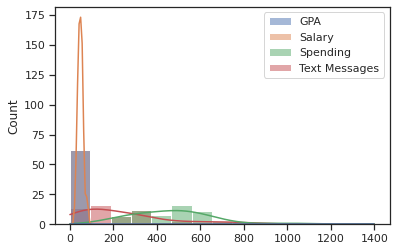

In [ ]:
sns.histplot(data=cmsu_df[['GPA','Salary','Spending','Text Messages']], kde=True);

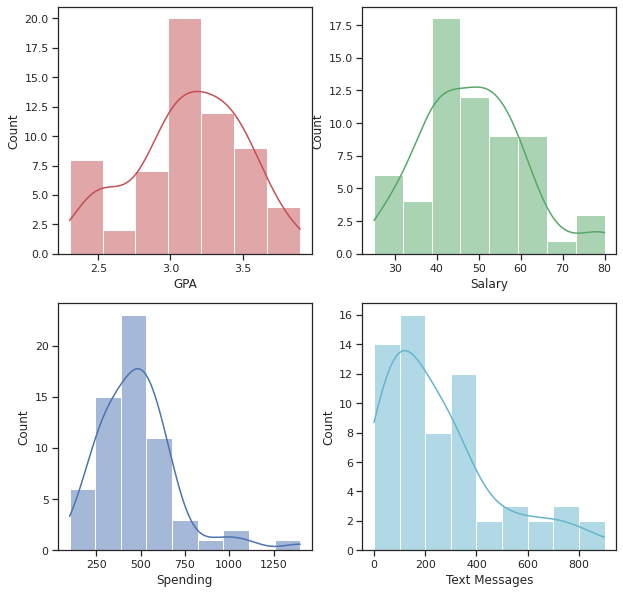

In [ ]:
fig3, axes3 = plt.subplots(nrows=2,ncols=2, squeeze=True)

fig3.set_size_inches(10,10)

aa= sns.histplot(data=cmsu_df, x= 'GPA', kde=True, ax=axes3[0,0], color='r');
#axes3[0,0].set_title('GPA')

ab= sns.histplot(data=cmsu_df, x= 'Salary', kde=True, ax=axes3[0,1], color='g');
#axes3[0,1].set_title('Salary')

ac= sns.histplot(data=cmsu_df, x= 'Spending', kde=True, ax=axes3[1,0], color='b');
#axes3[1,0].set_title('Spending')

ad= sns.histplot(data=cmsu_df, x= 'Text Messages', kde=True, ax=axes3[1,1], color='c');
#axes3[1,1].set_title('Text Messages')

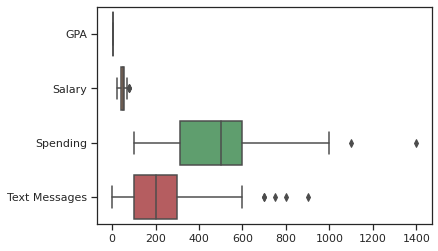

In [ ]:
sns.boxplot(data=cmsu_df[['GPA','Salary','Spending','Text Messages']], orient='h');

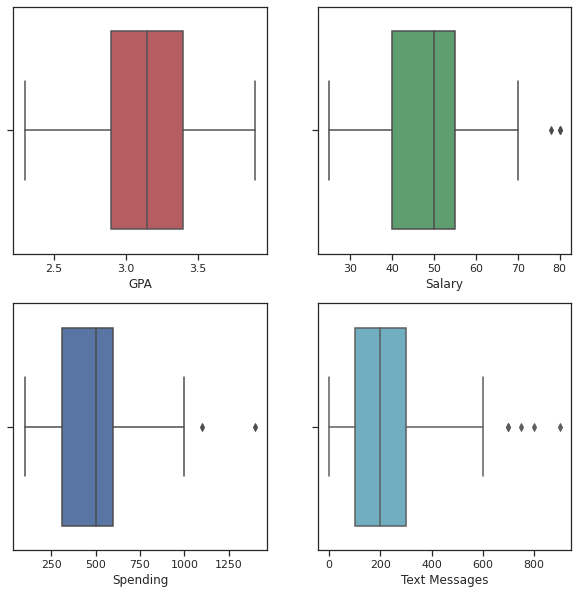

In [ ]:
fig4, axes4 = plt.subplots(nrows=2,ncols=2, squeeze=True)

fig4.set_size_inches(10,10)

aaa= sns.boxplot(data=cmsu_df, x= 'GPA', ax=axes4[0,0], color='r');
#axes3[0,0].set_title('GPA')

aab= sns.boxplot(data=cmsu_df, x= 'Salary', ax=axes4[0,1], color='g');
#axes3[0,1].set_title('Salary')

aac= sns.boxplot(data=cmsu_df, x= 'Spending', ax=axes4[1,0], color='b');
#axes3[1,0].set_title('Spending')

aad= sns.boxplot(data=cmsu_df, x= 'Text Messages', ax=axes4[1,1], color='c');
#axes3[1,1].set_title('Text Messages')

### 2.8.2 Write a note summarizing your conclusions

## Problem 3

### Problem Statement:
An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet are calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [2]:
shingles_df= pd.read_csv('.\A_B_shingles.csv')
shingles_df.head()

,A,B
0,0.44,0.14
1,0.61,0.15
2,0.47,0.31
3,0.30,0.16
4,0.15,0.37


In [ ]:
shingles_df.isnull().sum()

A    0
B    5
dtype: int64

In [5]:
shingles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


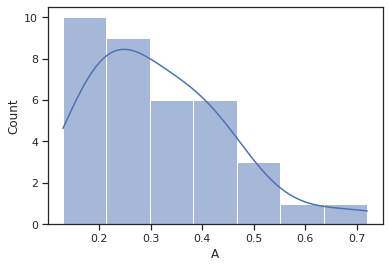

In [ ]:
sns.histplot(data=shingles_df['A'], kde=True);

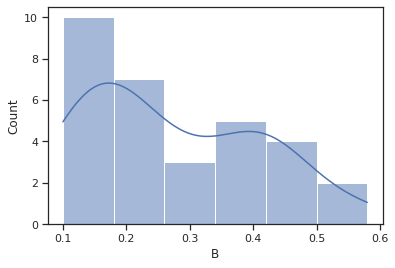

In [ ]:
sns.histplot(data=shingles_df['B'], kde=True);

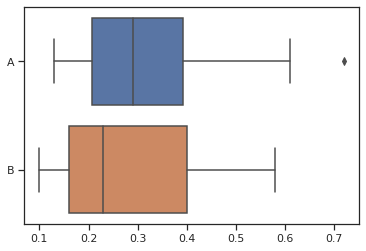

In [4]:
sns.boxplot(data=shingles_df, orient='h');

### 3.1 Do you think there is evidence that mean moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

In [ ]:
shingles_df.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [ ]:
t_statistic, p_value = ttest_1samp(shingles_df.A, 0.35)
print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -1.4735046253382782 p value: 0.07477633144907513 


In [ ]:
t_statistic, p_value = ttest_1samp(shingles_df.B, 0.35,nan_policy='omit' )

print('One sample t test \nt statistic: {0} p value: {1} '.format(t_statistic, p_value/2))

One sample t test 
t statistic: -3.1003313069986995 p value: 0.0020904774003191826 


### 3.2 Do you think that the population means for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

H0 : μ(A)= μ(B)  

Ha : μ(A)!= μ(B)  

α = 0.05  

In [ ]:
t_statistic,p_value=ttest_ind(shingles_df['A'],shingles_df['B'],equal_var=True ,nan_policy='omit')  

print("t_statistic={} and pvalue={}".format(round(t_statistic,3),round(p_value,3)))

t_statistic=1.29 and pvalue=0.202


# The End